In [1]:
!pip install mglearn

     |████████████████████████████████| 542kB 29.9MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582638 sha256=77572a9723c26608a7105550702d23ba2b614208bc782fad2ea92162f544e160
  Stored in directory: /root/.cache/pip/wheels/eb/a6/ea/a6a3716233fa62fc561259b5cb1e28f79e9ff3592c0adac5f0
Successfully built mglearn


In [2]:
import sklearn.tree as tree
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from sklearn.model_selection import train_test_split
import graphviz
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

In [3]:
iris = load_iris()
X = iris.data
Y = iris.target
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=0)

In [33]:
iris_random_forest = RandomForestClassifier(n_estimators=10, random_state=0)
iris_random_forest.fit(X_train, Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [34]:
print("train accuracy: {}".format(iris_random_forest.score(X_train, Y_train)))
print("test accuracy: {}".format(iris_random_forest.score(X_test, Y_test)))

train accuracy: 1.0
test accuracy: 0.9736842105263158


In [6]:
export_graphviz(iris_random_forest.estimators_[2], 
                out_file="iris_random_forest.dot", 
                max_depth=None, 
                feature_names=iris.feature_names, 
                class_names=iris.target_names, 
                label="all", 
                filled=True, 
                impurity=True)
iris_random_forest.estimators_[9]

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1914837113, splitter='best')

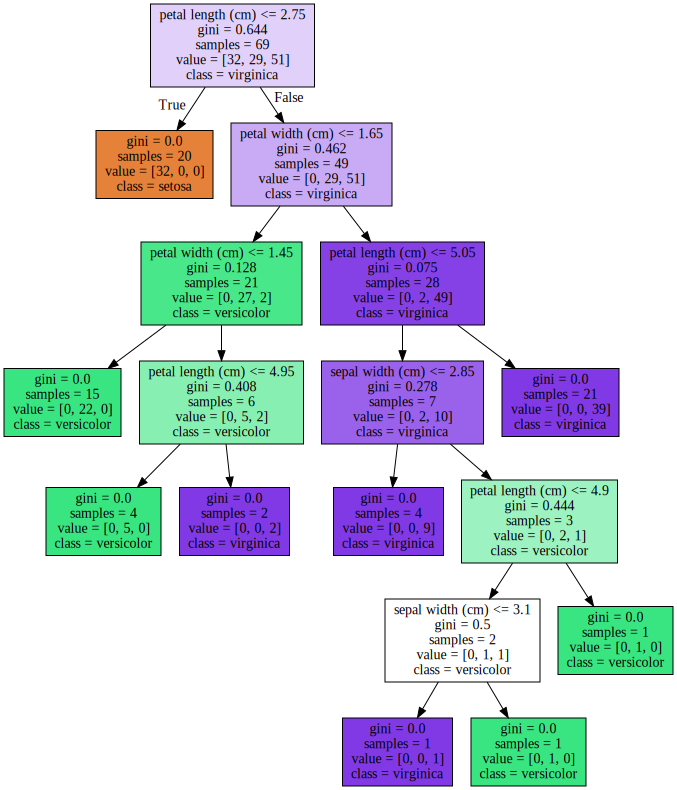

In [7]:
with open("iris_random_forest.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

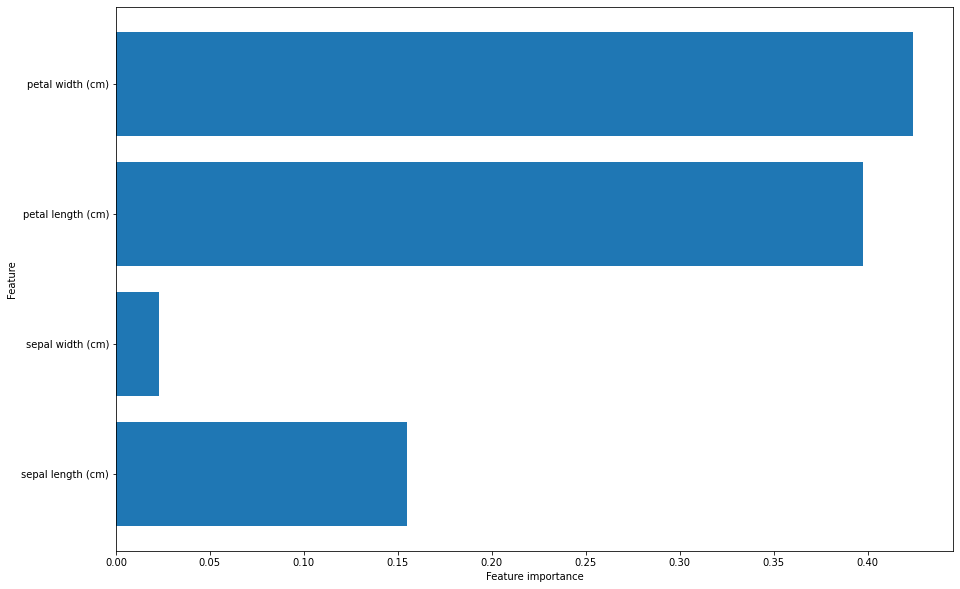

In [8]:
def plot_feature_importances_iris(model):
  n_features = iris.data.shape[1]
  plt.figure(figsize=(15,10))
  plt.barh(range(n_features), model.feature_importances_, align='center')
  plt.yticks(np.arange(n_features), iris.feature_names)
  plt.xlabel("Feature importance")
  plt.ylabel("Feature")
  plt.show()
plot_feature_importances_iris(iris_random_forest)